# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

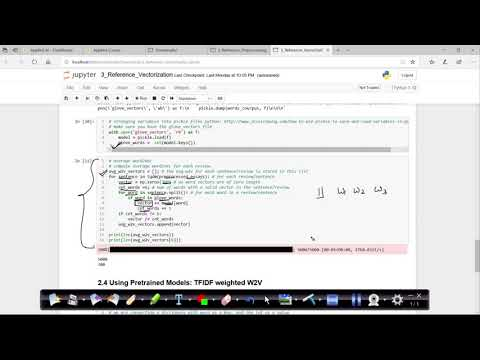

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
import pandas as pd
project_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/preprocessed_data.csv")

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
y=project_data['project_is_approved']
project_data.drop(['project_is_approved'], axis=1)

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(project_data, y,test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
from collections import Counter
my_counter = Counter()
for word in X_tr['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

my_counter = Counter()
for word in X_tr['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

project_data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
#Vectorizing Categorical data
def Categorical_Probabilities(ColName,alpha):
        Cat_Counter=dict(X_tr[ColName].value_counts())
        probs={}
        for i in Cat_Counter.keys():
            df_0=  np.round(len(X_tr[(X_tr["project_is_approved"] == 0) & (X_tr[ColName]==i)])+alpha*10/(Cat_Counter[i]+20*alpha),4)
            df_1=  np.round(len(X_tr[(X_tr["project_is_approved"] == 1) & (X_tr[ColName]==i)])+alpha*10/(Cat_Counter[i]+20*alpha),4)
            probs[i] = [ np.round(df_0/(df_0+df_1),3), np.round(df_1/(df_0+df_1),3)]
            
        return probs    
    
def Categorical_Hack(a,b):
    if a in b.keys():
        return b[a]
    else:
        return [0.5,0.5]  

In [ ]:
Categorical_Probs_cat = Categorical_Probabilities("clean_categories",1)
clean_categories_cat_hack = X_tr.apply(lambda x: Categorical_Hack(x["clean_categories"],Categorical_Probs_cat), axis=1)  
clean_categories_cat_hack=np.asarray(list(clean_categories_cat_hack))

In [ ]:
features_final=list(set(X_tr["clean_categories"]))
len(features_final)

51

In [ ]:
Categorical_Probs_subcat = Categorical_Probabilities("clean_subcategories",1)
clean_sub_categories_cat_hack = X_tr.apply(lambda x: Categorical_Hack(x["clean_subcategories"],Categorical_Probs_subcat), axis=1)  
len(clean_sub_categories_cat_hack)
clean_sub_categories_cat_hack=np.asarray(list(clean_sub_categories_cat_hack))

In [ ]:
features_final=list(set(X_tr["clean_subcategories"]))
len(features_final)

378

In [ ]:
clean_sub_categories_cat_hack.shape

(53531, 2)

In [ ]:
Categorical_Probs_school_state = Categorical_Probabilities("school_state",1)
school_state_cat_hack = X_tr.apply(lambda x: Categorical_Hack(x["school_state"], Categorical_Probs_school_state), axis=1)  
school_state_cat_hack=np.asarray(list(school_state_cat_hack))
school_state_cat_hack.shape

(53531, 2)

In [ ]:
Categorical_Probs_project_grade_category = Categorical_Probabilities("project_grade_category",1)
project_grade_category_cat_hack = X_tr.apply(lambda x: Categorical_Hack(x["project_grade_category"], Categorical_Probs_project_grade_category), axis=1)  
project_grade_category_cat_hack=np.asarray(list(project_grade_category_cat_hack))
project_grade_category_cat_hack.shape

(53531, 2)

In [ ]:
X_tr['teacher_prefix']=X_tr['teacher_prefix'].fillna("Not Specefied")
Categorical_Probs_teacher_prefix = Categorical_Probabilities("teacher_prefix",1)
teacher_prefix_cat_hack = X_tr.apply(lambda x: Categorical_Hack(x["teacher_prefix"], Categorical_Probs_teacher_prefix), axis=1)  
teacher_prefix_cat_hack=np.asarray(list(teacher_prefix_cat_hack))
teacher_prefix_cat_hack.shape

(53531, 2)

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essays_bow = CountVectorizer(min_df=10)
text_bow = vectorizer_essays_bow.fit_transform(X_tr['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)



Shape of matrix after one hot encodig  (53531, 12533)


In [ ]:
tr_features_bow=vectorizer_essays_bow.get_feature_names()

In [ ]:
#TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essays_tfidf = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer_essays_tfidf.fit_transform(X_tr['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
text_tfidf_train =text_tfidf

Shape of matrix after one hot encodig  (53531, 12533)


In [ ]:
import os
f = open('/content/drive/MyDrive/Colab Notebooks/glove_vectors', 'rb')
model = pickle.load(f)
glove_words =  set(model.keys())



In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 53531/53531 [00:18<00:00, 2832.90it/s]

53531
300


In [ ]:
#Using Pretrained Models: TFIDF weighted W2V
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_essays = TfidfVectorizer()
tfidf_model_essays.fit(X_tr['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words = set(tfidf_model_essays.get_feature_names())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 53531/53531 [02:02<00:00, 435.60it/s]

53531
300


In [ ]:
#Vectorizing Numerical features
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_tr['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(X_tr['price'].values.reshape(-1, 1))
price_standardized_train = price_standardized

Mean : 298.68382245801496, Standard deviation : 366.27799765308595


In [ ]:
price_standardized_train

array([[ 0.45699217],
       [-0.49059409],
       [ 0.17365547],
       ...,
       [-0.70627727],
       [-0.10785202],
       [-0.41141926]])

In [ ]:
#numerical quqntity is not required here

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized_train =teacher_number_of_previously_posted_projects_standardized

Mean : 11.080308606228167, Standard deviation : 27.59306396009386


In [ ]:
#Merging all the above features
print(clean_categories_cat_hack.shape)
print(clean_sub_categories_cat_hack.shape)
print(school_state_cat_hack.shape)
print(project_grade_category_cat_hack.shape)
print(teacher_prefix_cat_hack.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
#print(quantity_standardized.shape)
print(price_standardized.shape)
print(text_bow.shape)
#print(titles_bow.shape)

(53531, 2)
(53531, 2)
(53531, 2)
(53531, 2)
(53531, 2)
(53531, 1)
(53531, 1)
(53531, 12533)


In [ ]:
clean_categories_cat_hack[0]

array([0.152, 0.848])

In [ ]:
print(X_tr['teacher_prefix'].fillna("Not Specefied").shape)
print(X_tr['clean_categories'].shape)
print(X_tr['clean_subcategories'].shape)
print(X_tr['school_state'].shape)
print(X_tr['school_state'].shape)

(53531,)
(53531,)
(53531,)
(53531,)
(53531,)


In [ ]:
#Preparing Data for set-1
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
# X1 Data for set1
X1_tr = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,
            price_standardized,text_bow))
# X2 Data for set2
X2_tr = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
        price_standardized,text_tfidf))

In [ ]:
print(X1_tr.shape)
print(X2_tr.shape)

(53531, 12545)
(53531, 12545)


In [ ]:
avg_w2v_vectors[0].shape
avg_w2v_vectors = np.asarray(avg_w2v_vectors)
print(avg_w2v_vectors.shape)

(53531, 300)


In [ ]:
print(clean_categories_cat_hack.shape)
print(clean_sub_categories_cat_hack.shape)
print(school_state_cat_hack.shape)
print(project_grade_category_cat_hack.shape)
print(teacher_prefix_cat_hack.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
#print(quantity_standardized.shape)
print(price_standardized.shape)
print(avg_w2v_vectors.shape)
#print(avg_w2v_titles_vectors.shape)

(53531, 2)
(53531, 2)
(53531, 2)
(53531, 2)
(53531, 2)
(53531, 1)
(53531, 1)
(53531, 300)


In [ ]:
#https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.column_stack.html
X3_tr=np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,price_standardized,avg_w2v_vectors))
X3_tr.shape

(53531, 312)

In [ ]:
# X4 Data for set4
X4_tr = np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,tfidf_w2v_vectors))

#Preparing labels
y_tr=X_tr['project_is_approved']

In [ ]:
print(X1_tr.shape)
print(X2_tr.shape)
print(X3_tr.shape)
print(X4_tr.shape)
print(y_tr.shape)

(53531, 12545)
(53531, 12545)
(53531, 312)
(53531, 312)
(53531,)


In [ ]:
import nltk
nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [ ]:
#Preprocessing and Vectorising Test and CV data

In [ ]:
#Categorical Features
clean_categories_cat_hack = X_cv.apply(lambda x: Categorical_Hack(x["clean_categories"],Categorical_Probs_cat), axis=1)  
clean_categories_cat_hack=np.asarray(list(clean_categories_cat_hack))
clean_categories_cat_hack.shape

(22942, 2)

In [ ]:
clean_sub_categories_cat_hack = X_cv.apply(lambda x: Categorical_Hack(x["clean_subcategories"],Categorical_Probs_subcat), axis=1)  
clean_sub_categories_cat_hack=np.asarray(list(clean_sub_categories_cat_hack))
clean_sub_categories_cat_hack.shape

(22942, 2)

In [ ]:
school_state_cat_hack = X_cv.apply(lambda x: Categorical_Hack(x["school_state"], Categorical_Probs_school_state), axis=1)  
school_state_cat_hack=np.asarray(list(school_state_cat_hack))
school_state_cat_hack.shape

(22942, 2)

In [ ]:
project_grade_category_cat_hack = X_cv.apply(lambda x: Categorical_Hack(x["project_grade_category"], Categorical_Probs_project_grade_category), axis=1)  
project_grade_category_cat_hack=np.asarray(list(project_grade_category_cat_hack))
project_grade_category_cat_hack.shape

(22942, 2)

In [ ]:
X_cv['teacher_prefix']=X_cv['teacher_prefix'].fillna("Not Specefied")
teacher_prefix_cat_hack = X_cv.apply(lambda x: Categorical_Hack(x["teacher_prefix"], Categorical_Probs_teacher_prefix), axis=1)  
teacher_prefix_cat_hack=np.asarray(list(teacher_prefix_cat_hack))
teacher_prefix_cat_hack.shape

(22942, 2)

In [ ]:
#BOW
text_bow = vectorizer_essays_bow.transform(X_cv['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)



bow_words_tr=vectorizer_essays_bow.get_feature_names()
#print(bow_words_tr)

Shape of matrix after one hot encodig  (22942, 12533)


In [ ]:
k=["6"]
j=["5"]
k+j

['6', '5']

In [ ]:
#TFIDF
text_tfidf = vectorizer_essays_tfidf.transform(X_cv['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

text_tfidf_cv = text_tfidf

tfidf_words_tr=vectorizer_essays_tfidf.get_feature_names()

Shape of matrix after one hot encodig  (22942, 12533)


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))


100%|██████████| 22942/22942 [00:08<00:00, 2733.15it/s]

22942
300


In [ ]:
#TFIDF weighted W2V

tfidf_model_essays.transform(X_cv['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words = set(tfidf_model_essays.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))



100%|██████████| 22942/22942 [00:51<00:00, 443.75it/s]

22942
300


In [ ]:
# Numerical Features
price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_standardized_cv= price_standardized

teacher_number_of_previously_posted_projects_standardized_cv =teacher_number_of_previously_posted_projects_standardized

In [ ]:
#Mearging CV features
print(clean_categories_cat_hack.shape)
print(clean_sub_categories_cat_hack.shape)
print(school_state_cat_hack.shape)
print(project_grade_category_cat_hack.shape)
print(teacher_prefix_cat_hack.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
#print(quantity_standardized.shape)
print(price_standardized.shape)
print(text_bow.shape)
#print(titles_bow.shape)

(22942, 2)
(22942, 2)
(22942, 2)
(22942, 2)
(22942, 2)
(22942, 1)
(22942, 1)
(22942, 12533)


In [ ]:
#Preparing Data for set-1
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
# X1 Data for set1
X1_cv = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,text_bow))
# X2 Data for set2
X2_cv = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,text_tfidf))

In [ ]:
avg_w2v_vectors[0].shape
avg_w2v_vectors = np.asarray(avg_w2v_vectors)
print(avg_w2v_vectors.shape)


(22942, 300)


In [ ]:
print(clean_categories_cat_hack.shape)
print(clean_sub_categories_cat_hack.shape)
print(school_state_cat_hack.shape)
print(project_grade_category_cat_hack.shape)
print(teacher_prefix_cat_hack.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
print(price_standardized.shape)
print(avg_w2v_vectors.shape)


(22942, 2)
(22942, 2)
(22942, 2)
(22942, 2)
(22942, 2)
(22942, 1)
(22942, 1)
(22942, 300)


In [ ]:
#https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.column_stack.html
X3_cv=np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,avg_w2v_vectors))
X3_tr.shape

(53531, 312)

In [ ]:
# X4 Data for set4
X4_cv = np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,tfidf_w2v_vectors))

In [ ]:
X4_cv.shape
#Preparing labels
y_cv=X_cv['project_is_approved']

In [ ]:
print(X1_cv.shape)
print(X2_cv.shape)
print(X3_cv.shape)
print(X4_cv.shape)
print(y_cv.shape)

(22942, 12545)
(22942, 12545)
(22942, 312)
(22942, 312)
(22942,)


In [ ]:
clean_categories_cat_hack = X_test.apply(lambda x: Categorical_Hack(x["clean_categories"],Categorical_Probs_cat), axis=1)  
clean_categories_cat_hack=np.asarray(list(clean_categories_cat_hack))
print(clean_categories_cat_hack.shape)

clean_sub_categories_cat_hack = X_test.apply(lambda x: Categorical_Hack(x["clean_subcategories"],Categorical_Probs_subcat), axis=1)  
clean_sub_categories_cat_hack=np.asarray(list(clean_sub_categories_cat_hack))
print(clean_sub_categories_cat_hack.shape)

school_state_cat_hack = X_test.apply(lambda x: Categorical_Hack(x["school_state"], Categorical_Probs_school_state), axis=1)  
school_state_cat_hack=np.asarray(list(school_state_cat_hack))
print(school_state_cat_hack.shape)

project_grade_category_cat_hack = X_test.apply(lambda x: Categorical_Hack(x["project_grade_category"], Categorical_Probs_project_grade_category), axis=1)  
project_grade_category_cat_hack=np.asarray(list(project_grade_category_cat_hack))
print(project_grade_category_cat_hack.shape)

X_test['teacher_prefix']=X_test['teacher_prefix'].fillna("Not Specefied")
teacher_prefix_cat_hack = X_test.apply(lambda x: Categorical_Hack(x["teacher_prefix"], Categorical_Probs_teacher_prefix), axis=1)  
teacher_prefix_cat_hack=np.asarray(list(teacher_prefix_cat_hack))
print(teacher_prefix_cat_hack.shape)

(32775, 2)
(32775, 2)
(32775, 2)
(32775, 2)
(32775, 2)


In [ ]:
#Text data and numerical data
#BOW
text_bow = vectorizer_essays_bow.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)



#TFIDF
text_tfidf = vectorizer_essays_tfidf.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
text_tfidf_test = text_tfidf


# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))



#TFIDF weighted W2V

tfidf_model_essays.transform(X_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words = set(tfidf_model_essays.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))



# Numerical Features
price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_standardized_test = price_standardized
teacher_number_of_previously_posted_projects_standardized_test =teacher_number_of_previously_posted_projects_standardized

Shape of matrix after one hot encodig  (32775, 12533)
Shape of matrix after one hot encodig  (32775, 12533)


100%|██████████| 32775/32775 [00:11<00:00, 2857.23it/s]


32775
300


100%|██████████| 32775/32775 [01:13<00:00, 443.03it/s]

32775
300


In [ ]:
print(clean_categories_cat_hack.shape)
print(clean_sub_categories_cat_hack.shape)
print(school_state_cat_hack.shape)
print(project_grade_category_cat_hack.shape)
print(teacher_prefix_cat_hack.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
print(price_standardized.shape)
print(text_bow.shape)

(32775, 2)
(32775, 2)
(32775, 2)
(32775, 2)
(32775, 2)
(32775, 1)
(32775, 1)
(32775, 12533)


In [ ]:
#Preparing Data for set-1
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
# X1 Data for set1
X1_test = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,text_bow))
# X2 Data for set2
X2_test = hstack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,text_tfidf))

In [ ]:
avg_w2v_vectors = np.asarray(avg_w2v_vectors)
print(avg_w2v_vectors.shape)


(32775, 300)


In [ ]:
#https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.column_stack.html
X3_test=np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,avg_w2v_vectors))


# X4 Data for set4
X4_test = np.column_stack((clean_categories_cat_hack, clean_sub_categories_cat_hack,school_state_cat_hack,project_grade_category_cat_hack,teacher_prefix_cat_hack,teacher_number_of_previously_posted_projects_standardized,\
            price_standardized,tfidf_w2v_vectors))

In [ ]:
print(X1_test.shape)
print(X2_test.shape)
print(X3_test.shape)
print(X4_test.shape)
print(y_test.shape)

(32775, 12545)
(32775, 12545)
(32775, 312)
(32775, 312)
(32775,)


In [ ]:
#Implementation of decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
depth_alpha=[1, 5, 10, 50, 100, 500, 100]
min_sample_split_alpha=[5,10,100,500]

In [ ]:
aucTotal_cv=[]
aucTotal_train=[]
HayperParametesDictAUC_cv=dict()
for i in min_sample_split_alpha:
    for j in depth_alpha:
        print("for min sample split =", i,"and max depth = ", j)
        clf = DecisionTreeClassifier(min_samples_split=i ,criterion='gini', max_depth=j,class_weight = 'balanced',random_state=42)
        clf.fit(X1_tr, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X1_tr, y_tr)
        # predict the response on the crossvalidation train
        
        probs_cv = sig_clf.predict_proba(X1_cv)
    
        # predict the response on the train
        probs_train = sig_clf.predict_proba(X1_tr)
        
        # keep probabilities for the positive outcome only
        probs_cv = probs_cv[:, 1]
        probs_train = probs_train[:,1]
        
        # calculate AUC
        auc_cv = roc_auc_score(y_cv, probs_cv)
        auc_train = roc_auc_score(y_tr, probs_train)
        # evaluate CV accuracy
        probs_cv_acc=sig_clf.predict(X1_cv)
        acc_cv = accuracy_score(y_cv, probs_cv_acc, normalize=True) * float(100)
        print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        aucTotal_cv.append(auc_cv)
        aucTotal_train.append(auc_train) 
        HayperParametesDictAUC_cv["{},{}".format(i,j)]=auc_cv

for min sample split = 5 and max depth =  1

CV accuracy for alpha = 5.000000 is 84% and auc= 0.567
for min sample split = 5 and max depth =  5

CV accuracy for alpha = 5.000000 is 84% and auc= 0.641
for min sample split = 5 and max depth =  10

CV accuracy for alpha = 5.000000 is 84% and auc= 0.664
for min sample split = 5 and max depth =  50

CV accuracy for alpha = 5.000000 is 84% and auc= 0.643
for min sample split = 5 and max depth =  100

CV accuracy for alpha = 5.000000 is 84% and auc= 0.634
for min sample split = 5 and max depth =  500

CV accuracy for alpha = 5.000000 is 84% and auc= 0.626
for min sample split = 5 and max depth =  100

CV accuracy for alpha = 5.000000 is 84% and auc= 0.634
for min sample split = 10 and max depth =  1

CV accuracy for alpha = 10.000000 is 84% and auc= 0.567
for min sample split = 10 and max depth =  5

CV accuracy for alpha = 10.000000 is 84% and auc= 0.641
for min sample split = 10 and max depth =  10

CV accuracy for alpha = 10.000000 is 84% 

In [ ]:
aucTotal_cv[np.argmax(aucTotal_cv)]

0.6737014070432462

In [ ]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
alpha=max(HayperParametesDictAUC_cv.items(), key=operator.itemgetter(1))[0]
min_samples_split_cv,max_depth_cv = alpha.split(",")
min_samples_split_cv=int(min_samples_split_cv)
max_depth_cv = int(max_depth_cv)
hp_bow = alpha

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=min_samples_split_cv ,criterion='gini', max_depth=max_depth_cv,class_weight = 'balanced' ,random_state=42)
clf.fit(X1_tr, y_tr)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X1_tr, y_tr)






probs_test   =  sig_clf.predict_proba(X1_test)
probs_train  = sig_clf.predict_proba(X1_tr)
y_pred_test  = sig_clf.predict(X1_test)
y_pred_train = sig_clf.predict(X1_tr)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)






#y_pred_test = sig_clf.predict(X1_test)
#auc = roc_auc_score(y_test, y_pred_test)
auc_bow =auc
print("Test AUC: ",auc)
#y_pred_tr =  sig_clf.predict(X1_tr)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6812096037468798
Train AUC:  0.8694602890980587


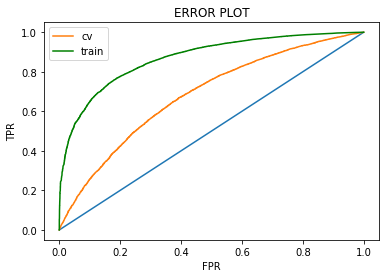

In [ ]:
import matplotlib.pyplot as plt
probs_test = sig_clf.predict_proba(X1_test)[:,1]
probs_train = sig_clf.predict_proba(X1_tr)[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)
fpr2, tpr2, thresholds2 = roc_curve(y_tr, probs_train)
# plot no skill
plt.plot([0, 1], [0, 1], color='C0')
# plot the roc curve for the model
plt.plot(fpr, tpr, color='C1',label='cv')
plt.plot(fpr2, tpr2, color='g',label='train')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOT")
# show the plot
plt.show()

In [ ]:
#Results based on the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,sig_clf.predict(X1_test) )
TPR=np.round(cm[1][1]/(cm[0][1]+cm[1][1])*100,2)
FPR=np.round(cm[0][0]/(cm[0][0]+cm[1][0])*100,2)
Precision= np.round(cm[1][1]/(cm[1][0]+cm[1][1])*100,2)
Recall = TPR
F1_Score= np.round((2*Precision*Recall)/(Recall+Precision),3)
F1_Score_l2=F1_Score

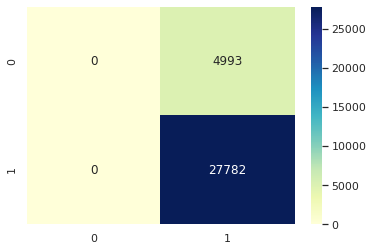

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
print("TPR: {}%\nFPR: {}%\nPrecision: {}%\nRecall: {}%\nF1 Score: {}% ".format(TPR,FPR,Precision,Recall,F1_Score))

TPR: 84.77%
FPR: nan%
Precision: 100.0%
Recall: 84.77%
F1 Score: 91.757% 


In [ ]:
pre=["clean_categories_0","clean_categories_1","clean_sub_categories_0","clean_sub_categories_1","school_state_0","school_state_1","project_grade_0","project_grade_1",\
"teacher_prefix_0","teacher_prefix_1"]
bow_words_tr=vectorizer_essays_bow.get_feature_names()
post=["TeacherPrevProjects","quantity_standardized","price_standardized" ]
final_features_bow=pre+bow_words_tr+post

In [ ]:
len(final_features_bow)

12546

In [ ]:
#Collecting False Negative rows indexs
#https://stackoverflow.com/questions/43193880/how-to-get-row-number-in-dataframe-in-pandas
test=[]
FN=pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
FN_2=FN[(FN["Actual"]==0) & (FN["Predicted"]==1)]

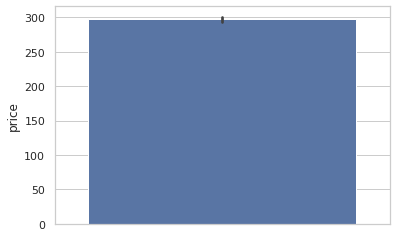

In [ ]:
price=[]
for i in FN_indexs:
    price.append(X_test.loc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="price", hue=FN_2["Predicted"], data=X_test)   

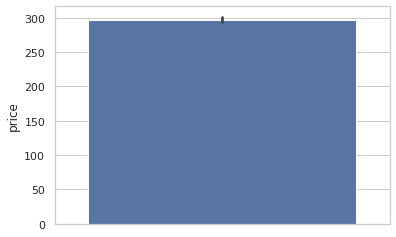

In [ ]:
ax = sns.barplot(y="price", hue=FN_2["Actual"], data=X_test)

In [ ]:
#Distribution plot of 'teacher_number_of_previously_posted_projects' in FN¶

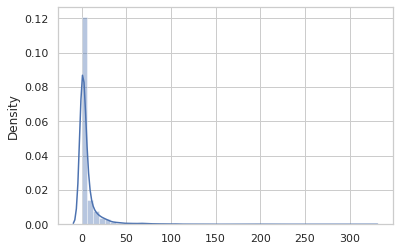

In [ ]:
teacher_number_of_previously_posted_projects=[]
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.loc[i]['teacher_number_of_previously_posted_projects'])
import seaborn as sns, numpy as np
ax = sns.distplot(teacher_number_of_previously_posted_projects)  

In [ ]:
#Applying Decision Trees on TFIDF, SET 2

depth_alpha=[1, 5, 10, 50]
min_sample_split_alpha=[5,10,100,500]
aucTotal_cv=[]
aucTotal_train=[]
HayperParametesDictAUC_cv=dict()
for i in min_sample_split_alpha:
    for j in depth_alpha:
        print("for min sample split =", i,"and max depth = ", j)
        clf = DecisionTreeClassifier(min_samples_split=i ,criterion='gini', max_depth=j,class_weight = 'balanced', random_state=42)
        clf.fit(X2_tr, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X2_tr, y_tr)
        # predict the response on the crossvalidation train
        
        probs_cv = sig_clf.predict_proba(X2_cv)
    
        # predict the response on the train
        probs_train = sig_clf.predict_proba(X2_tr)
        
        # keep probabilities for the positive outcome only
        probs_cv = probs_cv[:, 1]
        probs_train = probs_train[:,1]
        
        # calculate AUC
        auc_cv = roc_auc_score(y_cv, probs_cv)
        auc_train = roc_auc_score(y_tr, probs_train)
        # evaluate CV accuracy
        probs_cv_acc=sig_clf.predict(X2_cv)
        acc_cv = accuracy_score(y_cv, probs_cv_acc, normalize=True) * float(100)
        print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        aucTotal_cv.append(auc_cv)
        aucTotal_train.append(auc_train) 
        HayperParametesDictAUC_cv["{},{}".format(i,j)]=auc_cv


for min sample split = 5 and max depth =  1

CV accuracy for alpha = 5.000000 is 84% and auc= 0.567
for min sample split = 5 and max depth =  5

CV accuracy for alpha = 5.000000 is 84% and auc= 0.650
for min sample split = 5 and max depth =  10

CV accuracy for alpha = 5.000000 is 84% and auc= 0.664
for min sample split = 5 and max depth =  50

CV accuracy for alpha = 5.000000 is 84% and auc= 0.624
for min sample split = 10 and max depth =  1

CV accuracy for alpha = 10.000000 is 84% and auc= 0.567
for min sample split = 10 and max depth =  5

CV accuracy for alpha = 10.000000 is 84% and auc= 0.650
for min sample split = 10 and max depth =  10

CV accuracy for alpha = 10.000000 is 84% and auc= 0.664
for min sample split = 10 and max depth =  50

CV accuracy for alpha = 10.000000 is 84% and auc= 0.622
for min sample split = 100 and max depth =  1

CV accuracy for alpha = 100.000000 is 84% and auc= 0.567
for min sample split = 100 and max depth =  5

CV accuracy for alpha = 100.000000 is

In [ ]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
alpha=max(HayperParametesDictAUC_cv.items(), key=operator.itemgetter(1))[0]
min_samples_split_cv,max_depth_cv = alpha.split(",")
min_samples_split_cv=int(min_samples_split_cv)
max_depth_cv = int(max_depth_cv)
hp_tfidf=alpha

In [ ]:
clf_tfidf = DecisionTreeClassifier(min_samples_split=min_samples_split_cv ,criterion='gini',class_weight = 'balanced',max_depth=max_depth_cv, random_state=42)
clf_tfidf.fit(X2_tr, y_tr)
sig_clf = CalibratedClassifierCV(clf_tfidf, method="sigmoid")
sig_clf.fit(X2_tr, y_tr)
##########################

probs_test   =  sig_clf.predict_proba(X2_test)
probs_train  = sig_clf.predict_proba(X2_tr)
y_pred_test  = sig_clf.predict(X2_test)
y_pred_train = sig_clf.predict(X2_tr)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)





auc_tfidf=auc
print("Test AUC: ",auc)
#y_pred_tr =  sig_clf.predict(X2_tr)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6760468255009896
Train AUC:  0.7579153680524343


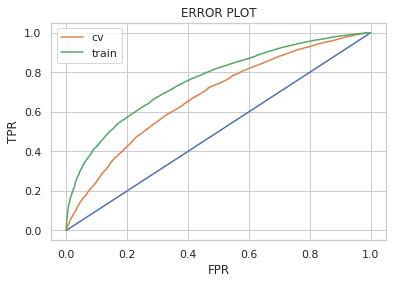

In [ ]:
import matplotlib.pyplot as plt
probs_test = sig_clf.predict_proba(X2_test)[:,1]
probs_train = sig_clf.predict_proba(X2_tr)[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)
fpr2, tpr2, thresholds2 = roc_curve(y_tr, probs_train)
# plot no skill
plt.plot([0, 1], [0, 1], color='C0')
# plot the roc curve for the model
plt.plot(fpr, tpr, color='C1',label='cv')
plt.plot(fpr2, tpr2, color='g',label='train')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOT")
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_test)
TPR=np.round(cm[1][1]/(cm[0][1]+cm[1][1])*100,2)
FPR=np.round(cm[0][0]/(cm[0][0]+cm[1][0])*100,2)
Precision= np.round(cm[1][1]/(cm[1][0]+cm[1][1])*100,2)
Recall = TPR
F1_Score= np.round((2*Precision*Recall)/(Recall+Precision),3)
F1_Score_l2=F1_Score

TPR: 84.77%
FPR: nan%
Precision: 100.0%
Recall: 84.77%
F1 Score: 91.757% 


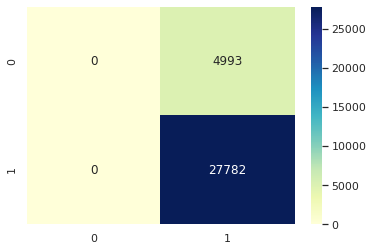

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

print("TPR: {}%\nFPR: {}%\nPrecision: {}%\nRecall: {}%\nF1 Score: {}% ".format(TPR,FPR,Precision,Recall,F1_Score))

In [ ]:
pre=["clean_categories_0","clean_categories_1","clean_sub_categories_0","clean_sub_categories_1","school_state_0","school_state_1","project_grade_0","project_grade_1",\
"teacher_prefix_0","teacher_prefix_1"]
tfidf_words_tr=vectorizer_essays_tfidf.get_feature_names()
post=["TeacherPrevProjects","quantity_standardized","price_standardized" ]
final_features_tfidf=pre+tfidf_words_tr+post

In [ ]:
len(final_features_tfidf)

12546

In [ ]:
#https://stackoverflow.com/questions/43193880/how-to-get-row-number-in-dataframe-in-pandas
test=[]
FN=pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
FN_2=FN[(FN["Actual"]==0) & (FN["Predicted"]==1)]

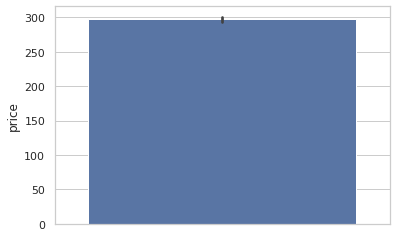

In [ ]:
price=[]
for i in FN_indexs:
    price.append(X_test.loc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="price", hue=FN_2["Predicted"], data=X_test)  

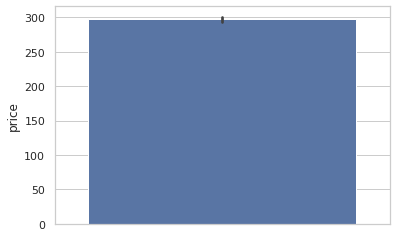

In [ ]:
ax = sns.barplot(y="price", hue=FN_2["Actual"], data=X_test)

In [ ]:
#Distribution plot of 'teacher_number_of_previously_posted_projects' in FN

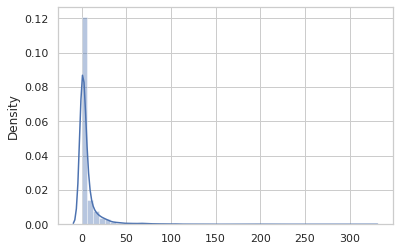

In [ ]:
teacher_number_of_previously_posted_projects=[]
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.loc[i]['teacher_number_of_previously_posted_projects'])
import seaborn as sns, numpy as np
ax = sns.distplot(teacher_number_of_previously_posted_projects)  

In [ ]:
#Applying Decision Trees on AVG W2V, SET 3

In [ ]:
depth_alpha=[1, 5, 10, 50]
min_sample_split_alpha=[5,10,100,500]
aucTotal_cv=[]
aucTotal_train=[]
HayperParametesDictAUC_cv=dict()
for i in min_sample_split_alpha:
    for j in depth_alpha:
        print("for min sample split =", i,"and max depth = ", j)
        clf = DecisionTreeClassifier(min_samples_split=i ,criterion='gini', max_depth=j, class_weight = 'balanced',random_state=42)
        clf.fit(X3_tr, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X3_tr, y_tr)
        # predict the response on the crossvalidation train
        
        probs_cv = sig_clf.predict_proba(X3_cv)
    
        # predict the response on the train
        probs_train = sig_clf.predict_proba(X3_tr)
        
        # keep probabilities for the positive outcome only
        probs_cv = probs_cv[:, 1]
        probs_train = probs_train[:,1]
        
        # calculate AUC
        auc_cv = roc_auc_score(y_cv, probs_cv)
        auc_train = roc_auc_score(y_tr, probs_train)
        # evaluate CV accuracy
        probs_cv_acc=sig_clf.predict(X3_cv)
        acc_cv = accuracy_score(y_cv, probs_cv_acc, normalize=True) * float(100)
        print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        aucTotal_cv.append(auc_cv)
        aucTotal_train.append(auc_train) 
        HayperParametesDictAUC_cv["{},{}".format(i,j)]=auc_cv

for min sample split = 5 and max depth =  1

CV accuracy for alpha = 5.000000 is 84% and auc= 0.567
for min sample split = 5 and max depth =  5

CV accuracy for alpha = 5.000000 is 84% and auc= 0.656
for min sample split = 5 and max depth =  10

CV accuracy for alpha = 5.000000 is 84% and auc= 0.653
for min sample split = 5 and max depth =  50

CV accuracy for alpha = 5.000000 is 84% and auc= 0.585
for min sample split = 10 and max depth =  1

CV accuracy for alpha = 10.000000 is 84% and auc= 0.567
for min sample split = 10 and max depth =  5

CV accuracy for alpha = 10.000000 is 84% and auc= 0.656
for min sample split = 10 and max depth =  10

CV accuracy for alpha = 10.000000 is 84% and auc= 0.654
for min sample split = 10 and max depth =  50

CV accuracy for alpha = 10.000000 is 84% and auc= 0.585
for min sample split = 100 and max depth =  1

CV accuracy for alpha = 100.000000 is 84% and auc= 0.567
for min sample split = 100 and max depth =  5

CV accuracy for alpha = 100.000000 is

In [ ]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
alpha=max(HayperParametesDictAUC_cv.items(), key=operator.itemgetter(1))[0]
min_samples_split_cv,max_depth_cv = alpha.split(",")
min_samples_split_cv=int(min_samples_split_cv)
max_depth_cv = int(max_depth_cv)
hp_w2vec = alpha

In [ ]:
clf_tfidf = DecisionTreeClassifier(min_samples_split=min_samples_split_cv ,criterion='gini',class_weight = 'balanced',max_depth=max_depth_cv, random_state=42)
clf_tfidf.fit(X3_tr, y_tr)
sig_clf = CalibratedClassifierCV(clf_tfidf, method="sigmoid")
sig_clf.fit(X3_tr, y_tr)
##########################

probs_test   =  sig_clf.predict_proba(X3_test)
probs_train  = sig_clf.predict_proba(X3_tr)
y_pred_test  = sig_clf.predict(X3_test)
y_pred_train = sig_clf.predict(X3_tr)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)

auc_w2vec=auc
print("Test AUC: ",auc)
#y_pred_tr =  sig_clf.predict(X2_tr)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6736954881315882
Train AUC:  0.7980438727291415


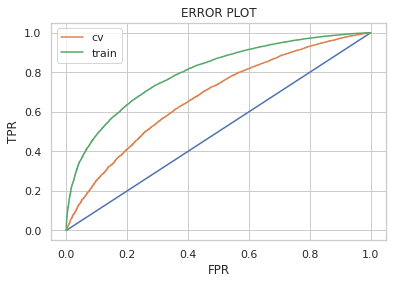

In [ ]:
import matplotlib.pyplot as plt
probs_test = sig_clf.predict_proba(X3_test)[:,1]
probs_train = sig_clf.predict_proba(X3_tr)[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)
fpr2, tpr2, thresholds2 = roc_curve(y_tr, probs_train)
# plot no skill
plt.plot([0, 1], [0, 1], color='C0')
# plot the roc curve for the model
plt.plot(fpr, tpr, color='C1',label='cv')
plt.plot(fpr2, tpr2, color='g',label='train')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOT")
# show the plot
plt.show()

TPR: 84.77%
FPR: nan%
Precision: 100.0%
Recall: 84.77%
F1 Score: 91.757% 


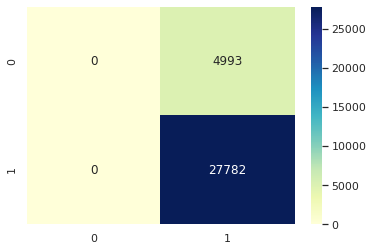

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_test)
TPR=np.round(cm[1][1]/(cm[0][1]+cm[1][1])*100,2)
FPR=np.round(cm[0][0]/(cm[0][0]+cm[1][0])*100,2)
Precision= np.round(cm[1][1]/(cm[1][0]+cm[1][1])*100,2)
Recall = TPR
F1_Score= np.round((2*Precision*Recall)/(Recall+Precision),3)
F1_Score_l2=F1_Score


import seaborn as sns; sns.set()
ax = sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

print("TPR: {}%\nFPR: {}%\nPrecision: {}%\nRecall: {}%\nF1 Score: {}% ".format(TPR,FPR,Precision,Recall,F1_Score))

In [ ]:
#https://stackoverflow.com/questions/43193880/how-to-get-row-number-in-dataframe-in-pandas
test=[]
FN=pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
FN_2=FN[(FN["Actual"]==0) & (FN["Predicted"]==1)]

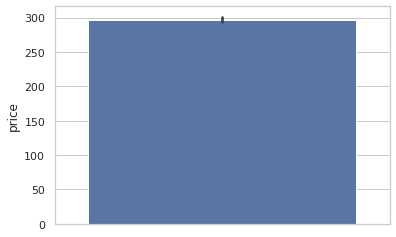

In [ ]:
price=[]
for i in FN_indexs:
    price.append(X_test.loc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="price", hue=FN_2["Predicted"], data=X_test) 

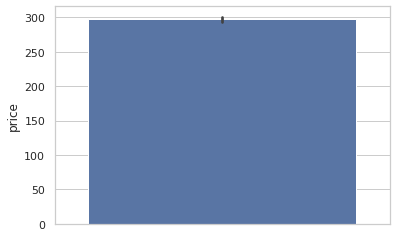

In [ ]:
ax = sns.barplot(y="price", hue=FN_2["Actual"], data=X_test)

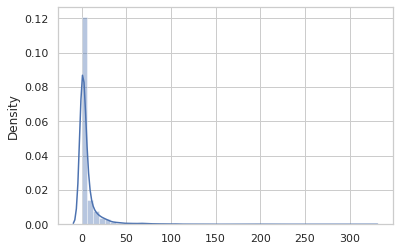

In [ ]:
teacher_number_of_previously_posted_projects=[]
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.loc[i]['teacher_number_of_previously_posted_projects'])
import seaborn as sns, numpy as np
ax = sns.distplot(teacher_number_of_previously_posted_projects) 

In [ ]:
#Applying Decision Trees on TFIDF W2V, SET 4

In [ ]:
depth_alpha=[1, 5, 10, 50]
min_sample_split_alpha=[5,10,100,500]
aucTotal_cv=[]
aucTotal_train=[]
HayperParametesDictAUC_cv=dict()
for i in min_sample_split_alpha:
    for j in depth_alpha:
        print("for min sample split =", i,"and max depth = ", j)
        clf = DecisionTreeClassifier(min_samples_split=i ,criterion='gini', max_depth=j, class_weight = 'balanced',random_state=42)
        clf.fit(X4_tr, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X4_tr, y_tr)
        # predict the response on the crossvalidation train
        
        probs_cv = sig_clf.predict_proba(X4_cv)
    
        # predict the response on the train
        probs_train = sig_clf.predict_proba(X4_tr)
        
        # keep probabilities for the positive outcome only
        probs_cv = probs_cv[:, 1]
        probs_train = probs_train[:,1]
        
        # calculate AUC
        auc_cv = roc_auc_score(y_cv, probs_cv)
        auc_train = roc_auc_score(y_tr, probs_train)
        # evaluate CV accuracy
        probs_cv_acc=sig_clf.predict(X4_cv)
        acc_cv = accuracy_score(y_cv, probs_cv_acc, normalize=True) * float(100)
        print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        aucTotal_cv.append(auc_cv)
        aucTotal_train.append(auc_train) 
        HayperParametesDictAUC_cv["{},{}".format(i,j)]=auc_cv

for min sample split = 5 and max depth =  1

CV accuracy for alpha = 5.000000 is 84% and auc= 0.567
for min sample split = 5 and max depth =  5

CV accuracy for alpha = 5.000000 is 84% and auc= 0.648
for min sample split = 5 and max depth =  10

CV accuracy for alpha = 5.000000 is 84% and auc= 0.650
for min sample split = 5 and max depth =  50

CV accuracy for alpha = 5.000000 is 84% and auc= 0.585
for min sample split = 10 and max depth =  1

CV accuracy for alpha = 10.000000 is 84% and auc= 0.567
for min sample split = 10 and max depth =  5

CV accuracy for alpha = 10.000000 is 84% and auc= 0.648
for min sample split = 10 and max depth =  10

CV accuracy for alpha = 10.000000 is 84% and auc= 0.650
for min sample split = 10 and max depth =  50

CV accuracy for alpha = 10.000000 is 84% and auc= 0.589
for min sample split = 100 and max depth =  1

CV accuracy for alpha = 100.000000 is 84% and auc= 0.567
for min sample split = 100 and max depth =  5

CV accuracy for alpha = 100.000000 is

In [ ]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
alpha=max(HayperParametesDictAUC_cv.items(), key=operator.itemgetter(1))[0]
min_samples_split_cv,max_depth_cv = alpha.split(",")
min_samples_split_cv=int(min_samples_split_cv)
max_depth_cv = int(max_depth_cv)
hp_tfidf_w2vec = alpha

In [ ]:
clf_tfidf = DecisionTreeClassifier(min_samples_split=min_samples_split_cv ,criterion='gini',class_weight = 'balanced',max_depth=max_depth_cv, random_state=42)
clf_tfidf.fit(X4_tr, y_tr)
sig_clf = CalibratedClassifierCV(clf_tfidf, method="sigmoid")
sig_clf.fit(X4_tr, y_tr)
##########################

probs_test   =  sig_clf.predict_proba(X4_test)
probs_train  = sig_clf.predict_proba(X4_tr)
y_pred_test  = sig_clf.predict(X4_test)
y_pred_train = sig_clf.predict(X4_tr)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)





auc_tfidf_w2vec=auc
print("Test AUC: ",auc)
#y_pred_tr =  sig_clf.predict(X2_tr)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6701844608223595
Train AUC:  0.7964745043730603


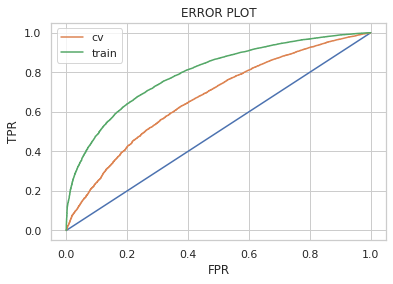

In [ ]:
import matplotlib.pyplot as plt
probs_test = sig_clf.predict_proba(X4_test)[:,1]
probs_train = sig_clf.predict_proba(X4_tr)[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)
fpr2, tpr2, thresholds2 = roc_curve(y_tr, probs_train)
# plot no skill
plt.plot([0, 1], [0, 1], color='C0')
# plot the roc curve for the model
plt.plot(fpr, tpr, color='C1',label='cv')
plt.plot(fpr2, tpr2, color='g',label='train')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOT")
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_test)
TPR=np.round(cm[1][1]/(cm[0][1]+cm[1][1])*100,2)
FPR=np.round(cm[0][0]/(cm[0][0]+cm[1][0])*100,2)
Precision= np.round(cm[1][1]/(cm[1][0]+cm[1][1])*100,2)
Recall = TPR
F1_Score= np.round((2*Precision*Recall)/(Recall+Precision),3)
F1_Score_l2=F1_Score

TPR: 84.77%
FPR: nan%
Precision: 100.0%
Recall: 84.77%
F1 Score: 91.757% 


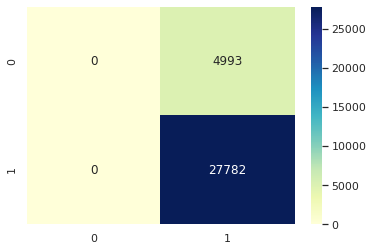

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

print("TPR: {}%\nFPR: {}%\nPrecision: {}%\nRecall: {}%\nF1 Score: {}% ".format(TPR,FPR,Precision,Recall,F1_Score))

In [ ]:
#https://stackoverflow.com/questions/43193880/how-to-get-row-number-in-dataframe-in-pandas
test=[]
FN=pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
FN_2=FN[(FN["Actual"]==0) & (FN["Predicted"]==1)]

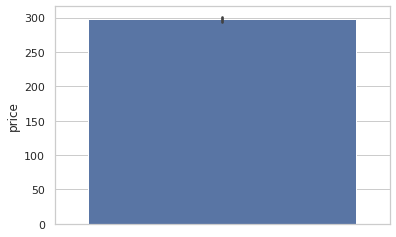

In [ ]:
price=[]
for i in FN_indexs:
    price.append(X_test.loc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="price", hue=FN_2["Predicted"], data=X_test)  

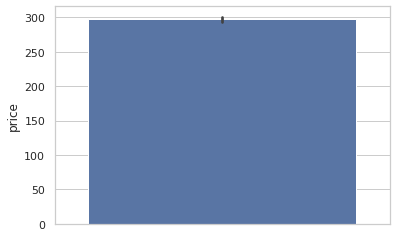

In [ ]:
ax = sns.barplot(y="price", hue=FN_2["Actual"], data=X_test)

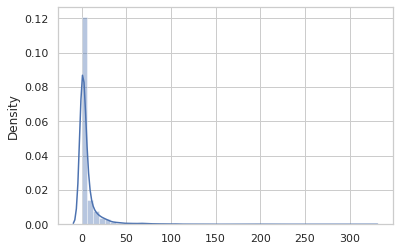

In [ ]:
teacher_number_of_previously_posted_projects=[]
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.loc[i]['teacher_number_of_previously_posted_projects'])
import seaborn as sns, numpy as np
ax = sns.distplot(teacher_number_of_previously_posted_projects) 

In [ ]:
top_5000_features=np.argsort(clf_tfidf.feature_importances_)
top_5000_features=top_5000_features[:5000]

In [ ]:
#pick multiple csr columns based on index: https://stackoverflow.com/questions/13352280/slicing-sparse-matrices-in-scipy-which-types-work-best
indices = np.where(top_5000_features)[0]
X2_tr_5000 = X2_tr.tocsr()[:,indices]
X2_cv_5000 = X2_cv.tocsr()[:,indices]
X2_test_5000 = X2_test.tocsr()[:,indices]

#Check the shape of the new Data's

print(X2_tr_5000.shape)
print(X2_cv_5000.shape)
print(X2_test_5000.shape)

(53531, 311)
(22942, 311)
(32775, 311)


In [ ]:
from sklearn.linear_model import LogisticRegression
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000] 

aucTotal_cv=[]
aucTotal_train=[]
HayperParametesDictAUC_cv=dict()
for i in alpha:
        clf = LogisticRegression(C=i)
        clf.fit(X2_tr_5000, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X2_tr_5000, y_tr)
        # predict the response on the crossvalidation train
        
    
        # predict the response on the crossvalidation train

        probs_cv = sig_clf.predict_proba(X2_cv_5000)

        # predict the response on the train
        probs_train = sig_clf.predict_proba(X2_tr_5000)

        # keep probabilities for the positive outcome only
        probs_cv = probs_cv[:, 1]
        probs_train = probs_train[:,1]

        # calculate AUC
        auc_cv = roc_auc_score(y_cv, probs_cv)
        auc_train = roc_auc_score(y_tr, probs_train)

        # $$$$$$$$$$
        # evaluate CV accuracy
        probs_cv_acc=sig_clf.predict(X2_cv_5000)
        acc_cv = accuracy_score(y_cv, probs_cv_acc, normalize=True) * float(100)
        print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        aucTotal_cv.append(auc_cv)
        aucTotal_train.append(auc_train) 
    
    
    
    
    
        ###############$$$$$$$$$$$$$%%%%%%%%%%%%%%%
    

        # evaluate CV accuracy
        #acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
        #print('\nCV accuracy for alpha = %f is %d%% and auc= %.3f' % (i, acc_cv,auc_cv))
        #aucTotal_cv.append(auc_cv)
        #aucTotal_train.append(auc_train) 
       


CV accuracy for alpha = 0.000001 is 84% and auc= 0.598

CV accuracy for alpha = 0.000010 is 84% and auc= 0.598

CV accuracy for alpha = 0.000100 is 84% and auc= 0.599

CV accuracy for alpha = 0.001000 is 84% and auc= 0.601

CV accuracy for alpha = 0.010000 is 84% and auc= 0.608

CV accuracy for alpha = 0.100000 is 84% and auc= 0.602

CV accuracy for alpha = 1.000000 is 84% and auc= 0.599

CV accuracy for alpha = 10.000000 is 84% and auc= 0.596

CV accuracy for alpha = 100.000000 is 84% and auc= 0.594

CV accuracy for alpha = 1000.000000 is 84% and auc= 0.593

CV accuracy for alpha = 10000.000000 is 84% and auc= 0.594

CV accuracy for alpha = 100000.000000 is 84% and auc= 0.593


In [ ]:
hp_log_5000=alpha[np.argmax(aucTotal_cv)]

In [ ]:
clf_tfidf = DecisionTreeClassifier(min_samples_split=min_samples_split_cv ,criterion='gini',class_weight = 'balanced',max_depth=max_depth_cv, random_state=42)
clf_tfidf.fit(X4_tr, y_tr)
sig_clf = CalibratedClassifierCV(clf_tfidf, method="sigmoid")
sig_clf.fit(X4_tr, y_tr)
##########################

probs_test   =  sig_clf.predict_proba(X4_test)
probs_train  = sig_clf.predict_proba(X4_tr)
y_pred_test  = sig_clf.predict(X4_test)
y_pred_train = sig_clf.predict(X4_tr)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)





auc_tfidf_w2vec=auc
print("Test AUC: ",auc)
#y_pred_tr =  sig_clf.predict(X2_tr)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6701844608223595
Train AUC:  0.7964745043730603


In [ ]:
clf = LogisticRegression(C=alpha[np.argmax(aucTotal_cv)])
clf.fit(X2_tr_5000, y_tr)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X2_tr_5000, y_tr)



probs_test   =  sig_clf.predict_proba(X2_test_5000)
probs_train  = sig_clf.predict_proba(X2_tr_5000)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
probs_train = probs_train[:,1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)




auc_logistic_5000=auc
print("Test AUC: ",auc)
auc = roc_auc_score(y_tr, probs_train)
print("Train AUC: ",auc)

Test AUC:  0.6163365880182727
Train AUC:  0.6276084037818577


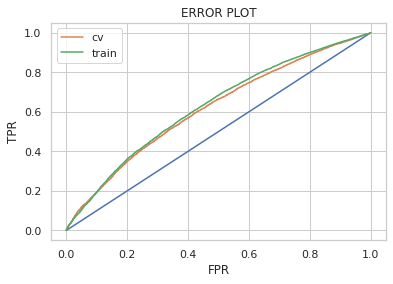

In [ ]:
import matplotlib.pyplot as plt
probs_test = sig_clf.predict_proba(X2_test_5000)[:,1]
probs_train = sig_clf.predict_proba(X2_tr_5000)[:,1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)
fpr2, tpr2, thresholds2 = roc_curve(y_tr, probs_train)
# plot no skill
plt.plot([0, 1], [0, 1], color='C0')
# plot the roc curve for the model
plt.plot(fpr, tpr, color='C1',label='cv')
plt.plot(fpr2, tpr2, color='g',label='train')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOT")
# show the plot
plt.show()

TPR: 84.77%
FPR: nan%
Precision: 100.0%
Recall: 84.77%
F1 Score: 91.757% 


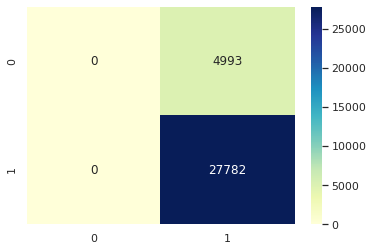

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_test)
TPR=np.round(cm[1][1]/(cm[0][1]+cm[1][1])*100,2)
FPR=np.round(cm[0][0]/(cm[0][0]+cm[1][0])*100,2)
Precision= np.round(cm[1][1]/(cm[1][0]+cm[1][1])*100,2)
Recall = TPR
F1_Score= np.round((2*Precision*Recall)/(Recall+Precision),3)
F1_Score_l2=F1_Score

import seaborn as sns; sns.set()
ax = sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

print("TPR: {}%\nFPR: {}%\nPrecision: {}%\nRecall: {}%\nF1 Score: {}% ".format(TPR,FPR,Precision,Recall,F1_Score))

In [ ]:
# Please compare all yfrom prettytable import PrettyTable
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
x.add_row(["BOW", "DecisionTreeClassifier", hp_bow, np.round(auc_bow,5)])
x.add_row(["Tfidf","DecisionTreeClassifier", hp_tfidf, np.round(auc_tfidf,5)])
x.add_row(["Word2Vec", "DecisionTreeClassifier", hp_w2vec, np.round(auc_w2vec,5)])
x.add_row(["TfidfWord2Vec","DecisionTreeClassifier", hp_tfidf_w2vec, np.round(auc_tfidf_w2vec,5)])
x.add_row(["Tfidf","LogisticRegression", hp_log_5000, np.round(auc_logistic_5000,5)])

In [ ]:
print(x)

+---------------+------------------------+-----------------+---------+
|   Vectorizer  |         Model          | Hyper Parameter |   AUC   |
+---------------+------------------------+-----------------+---------+
|      BOW      | DecisionTreeClassifier |      500,50     | 0.68121 |
|     Tfidf     | DecisionTreeClassifier |      500,10     | 0.67605 |
|    Word2Vec   | DecisionTreeClassifier |      500,10     |  0.6737 |
| TfidfWord2Vec | DecisionTreeClassifier |      500,10     | 0.67018 |
|     Tfidf     |   LogisticRegression   |       0.01      | 0.61634 |
+---------------+------------------------+-----------------+---------+
